# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of ***28x28 greyscale images of clothes***. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [23]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
%matplotlib inline
import helper

In [24]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

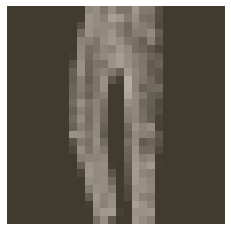

In [25]:
# Lets Preview this Dataset
image, label = next(iter(trainloader))
helper.imshow(image[0,:]) # Show first image, all pixeLs

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [26]:
# Parameter
epochs = 10
lr_ = 0.001

In [32]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,56),
                      nn.ReLU(),
                      nn.Linear(56,28),
                      nn.ReLU(),
                      nn.Linear(28,10),
                      nn.LogSoftmax(dim=1))

# log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss
criterion = nn.NLLLoss()

#More About Softmax and Negative Log Likelihood Error Function

# error = -log(x)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [33]:
#Adam Gradient Descent Optimizer - Batch Optimizer
optimizer = optim.Adam(model.parameters(), lr=lr_)

for e in range(epochs):
    running_loss = 0
    
    # For each batch of images
    for images,labels in trainloader:
        
        #Flatten
        images = images.view(images.shape[0],-1)
        
        # Train Pass
        optimizer.zero_grad()
        
        # Foward Pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backward Pass
        loss.backward() # Calculate Gradients with respect to weigths
        optimizer.step() # Backpropagate, correct weights
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        
print("Done Training")

Training loss: 0.5611186372255211
Training loss: 0.39161655894601777
Training loss: 0.3541282117366791
Training loss: 0.32816526106298605
Training loss: 0.3075229085203427
Training loss: 0.2931528376268425
Training loss: 0.2815662620386589
Training loss: 0.2672000677505536
Training loss: 0.25786860594585503
Training loss: 0.24724336306074027


tensor([[-1.3675e-02, -1.2145e+01, -7.7013e+00, -5.1236e+00, -1.2291e+01,
         -1.4517e+01, -4.9391e+00, -1.9376e+01, -1.2480e+01, -1.6993e+01]])
tensor([[9.8642e-01, 5.3129e-06, 4.5225e-04, 5.9546e-03, 4.5940e-06, 4.9569e-07,
         7.1613e-03, 3.8479e-09, 3.8016e-06, 4.1707e-08]])


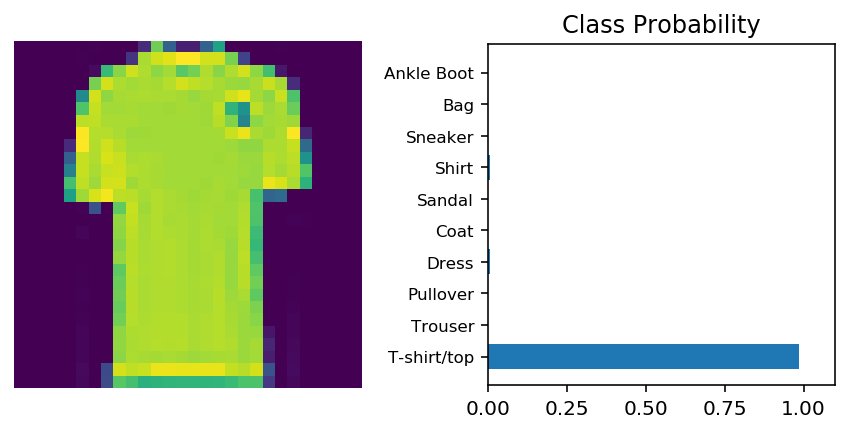

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = next(iter(testloader))
images, labels = dataiter
img = images[1]
img = img.reshape(1,784)

with torch.no_grad():
    logps = model(img)
print(logps)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

tensor([[-7.8932e+00, -7.8895e+00, -1.0357e+01, -1.3734e-03, -8.9539e+00,
         -1.7803e+01, -7.7054e+00, -2.7060e+01, -1.1234e+01, -2.2713e+01]])
tensor([[3.7326e-04, 3.7465e-04, 3.1778e-05, 9.9863e-01, 1.2924e-04, 1.8543e-08,
         4.5040e-04, 1.7703e-12, 1.3214e-05, 1.3679e-10]])


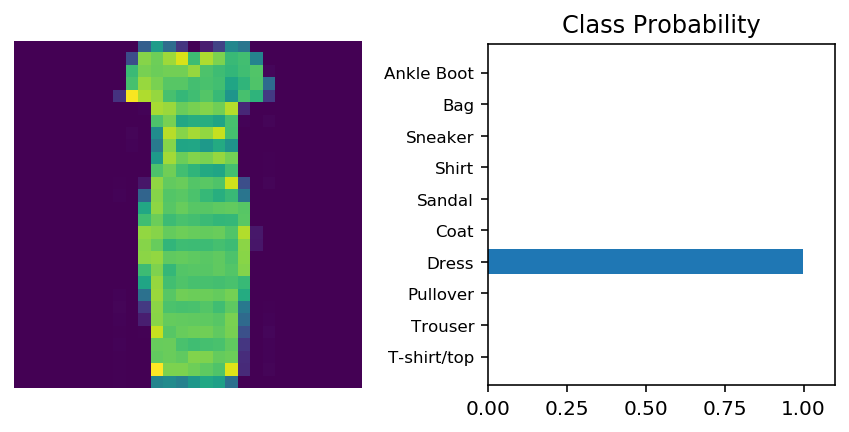

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = next(iter(testloader))
images, labels = dataiter
img = images[1]
img = img.reshape(1,784)

with torch.no_grad():
    logps = model(img)
print(logps)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

tensor([[-1.2447e+01, -5.3644e-06, -1.6992e+01, -1.3710e+01, -1.7926e+01,
         -2.5039e+01, -1.4920e+01, -3.7858e+01, -1.7764e+01, -3.3691e+01]])
tensor([[3.9281e-06, 9.9999e-01, 4.1712e-08, 1.1115e-06, 1.6396e-08, 1.3361e-11,
         3.3135e-07, 3.6181e-17, 1.9280e-08, 2.3342e-15]])


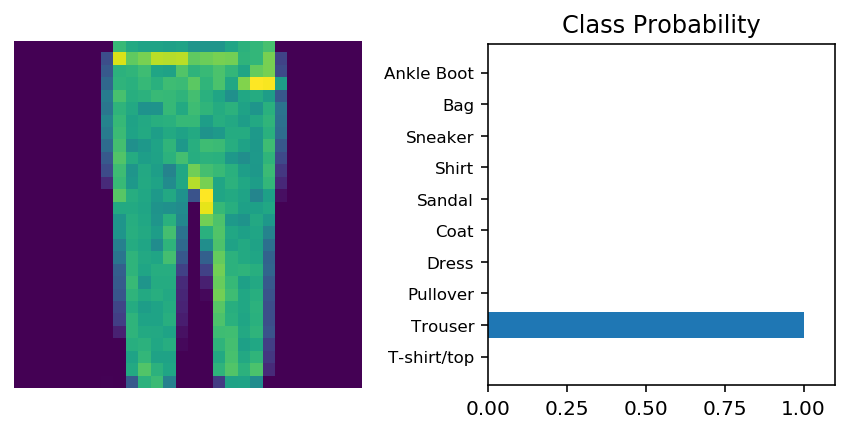

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = next(iter(testloader))
images, labels = dataiter
img = images[1]
img = img.reshape(1,784)

with torch.no_grad():
    logps = model(img)
print(logps)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

tensor([[-13.8979, -13.1822, -15.3545, -10.5314, -13.3943,  -3.5716, -13.4024,
          -0.0758,  -3.1207,  -7.2746]])
tensor([[9.2093e-07, 1.8839e-06, 2.1459e-07, 2.6685e-05, 1.5238e-06, 2.8110e-02,
         1.5115e-06, 9.2704e-01, 4.4124e-02, 6.9291e-04]])


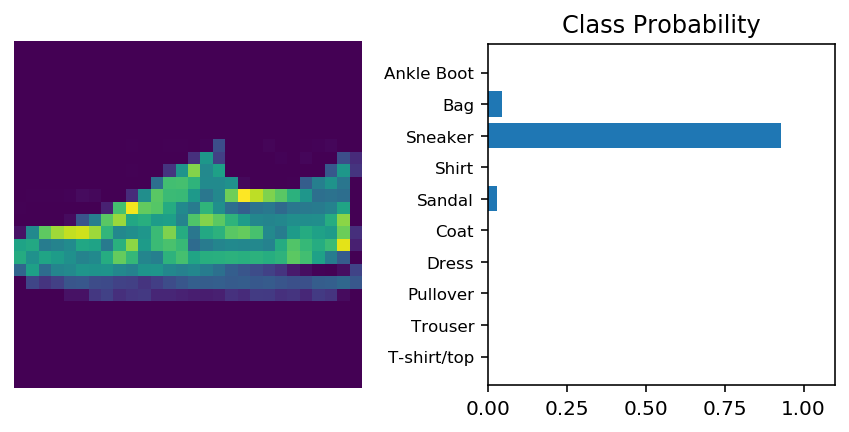

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = next(iter(testloader))
images, labels = dataiter
img = images[1]
img = img.reshape(1,784)

with torch.no_grad():
    logps = model(img)
print(logps)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(ps)

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')